Written by Tucker Ely for ENKI, Aug 2018.

Ported to WORM by Grayson Boyer, Jan 2021

# 1 - Set up

In [1]:
import os, sys
sys.path.insert(1, '/home/shock/worm_scripts')
import tucker.Call_EQ3_speciate2

# 2 - Set Variables

#### 2.1 - Supply Database

In [2]:
data0 = 'tde' # The 3-letter database suffix to be used.

#### 2.2 - Set temperature, pressure, pH, fO2,  step number, and charge balance option. 
For T, P, pH,a nd fO2, provide either a stand alone point value, or a range (as a min and max), set in square brackets. IE T = 25.0, or T = [25, 50]. All ranges are read in as low to high, regardless of the order they are given in.




In [3]:
### Provide point or range
T = 100 #  T point or range in celsius
P = 200 #  P point or range in bars
pH = [1, 12] #  pH point or range. This is overridden if H+ is set to hetero EQ with a mineral
fO2 = -10.0 #  Log(fO2). This is overridden if 'O2(g)' is set to hetero EQ with a mineral

### How many steps to divide ranges into?
steps = 40.0  

### Which chemical species should be used to charge balance the system?  i.e, 'Na+' or 'Cl-'
charge_bal = 'none' #  species to balance charge on, or 'none' for no charge balance.

#### 2.3 - Set chemical species.

Set with either a point value, or a range: ["name", fixed molality] or ["name" ,[mol min, mol max]]. Note the proper [] usage for ranges. IE ['SO4-2', 0.001],  or  ['SO4-2', [0.001, 0.000001]].

These chemical species names must be identical to those in the data0 set in section 2.1. To check the syntax of the chemical species in the database, remove the '#' in front of the code in block 2.1, and then ‘shift + enter’ in the cell.

In [4]:
Aqueous = []
#Aqueous = [['HCO3-', [0.001, 0.000001]]]
# Aqueous = [['HCO3-', 0.001],['CO2(g)', [0.00001, 0.1]]]

#### 2.4 - Set chemical species in equilibrium with a mineral.

Set with ["solid name", "aqueous name"].
This field can be left blank if desired. As above, the names must match exactly with the data0 used. To check the syntax of the chemical species in the database, remove the '#' in front of the code in block 2.1, and then ‘shift + enter’ in the cell.

Note: you cannot use a mineral that does not have all components loaded (other than the species it is heterogeneously controlling). IE, if the aqueous aluminum content is set to equilibrium with Albite via: ['ALBITE','Al+3], then Na+ and SiO2,AQ must also be present in the aqueous section above.

In [5]:
Hetero =[['QUARTZ', 'SiO2,AQ']]
# Hetero =[['BRUCITE', 'Mg+2'], ['CHRYSOTILE', 'SiO2,AQ'], ['CALCITE', 'Ca+2']]
# Hetero =[['TREMOLITE', 'SiO2,AQ'], ['CHRYSOTILE', 'Mg+2'], ['DIOPSIDE', 'Ca+2']]

#### 2.5 - Set axes and speciation.

The speciate option designates which chemical component of the system will be displayed as the mol fraction of its constiuent species.

Of the ranges supplied, which is to be used as the x-axis? (the name here must match exactly)
y_axis should usually be set to one of the heterogeneous equilibrium species.


In [6]:
speciate = 'SiO2,AQ' # pick an aqueous species that is loaded (in Aqueous, or Heterogeneous EQ). Leave blank '' if not desired.
x_axis = 'pH' # pick one of the user set ranges
y_axis = 'SiO2,AQ' # pick one aq species from the hetero list or ('O2(g) for'fO2, H+ for pH)

# 3 - Run EQ3

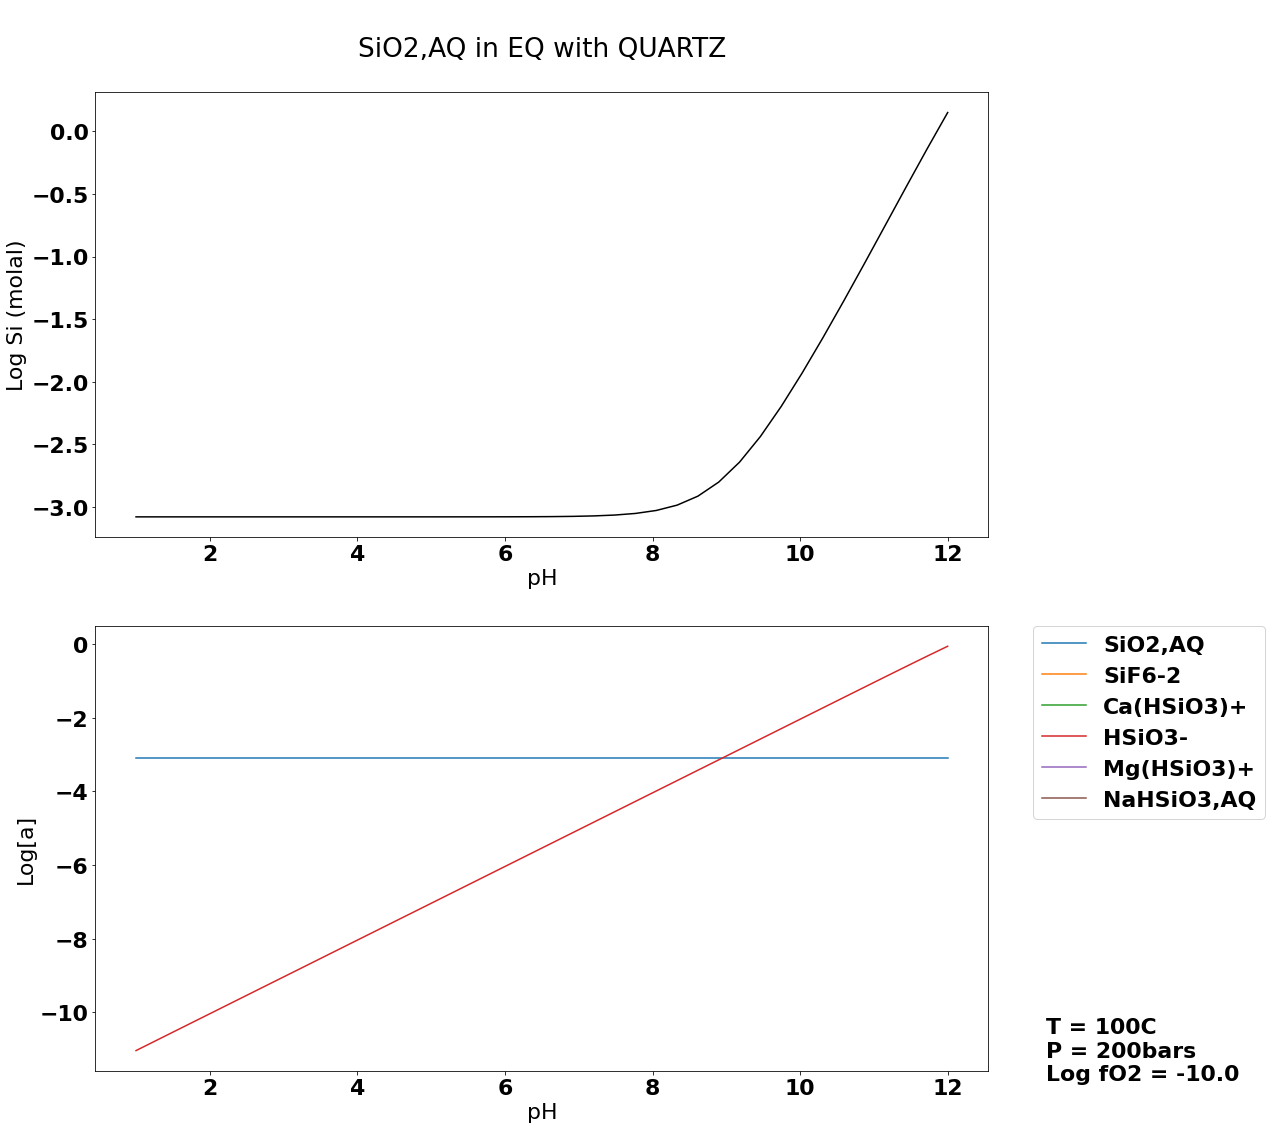

In [7]:
tucker.Call_EQ3_speciate2.main(data0, T, P, pH, fO2, Aqueous, Hetero, steps, x_axis, y_axis, speciate, charge_bal)